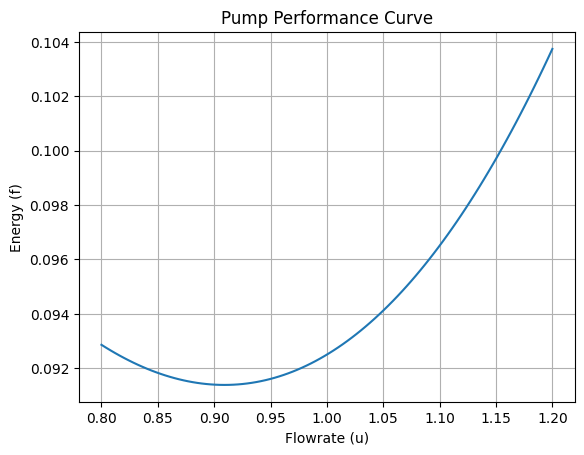

In [1]:
# generate an approximation for a simple pump performance curve given by a 3rd order polynomial fit with the flowrate as input and energy as output

def ppf_approx(u, alpha=0.05): # polynomial approximation of the energy price function due to water injection by pumps
    return (3.15 - (- 1.1 * u**3 + 0.4 * u**2 + 2.0 * u))*alpha

import numpy as np

u = np.linspace(0.8, 1.2, 100)
f = ppf_approx(u)

import matplotlib.pyplot as plt

plt.plot(u, f)
plt.xlabel('Flowrate (u)')
plt.ylabel('Energy (f)')
plt.title('Pump Performance Curve')
plt.grid(True)
plt.show()  

Text(0, 0.5, 'water saturation')

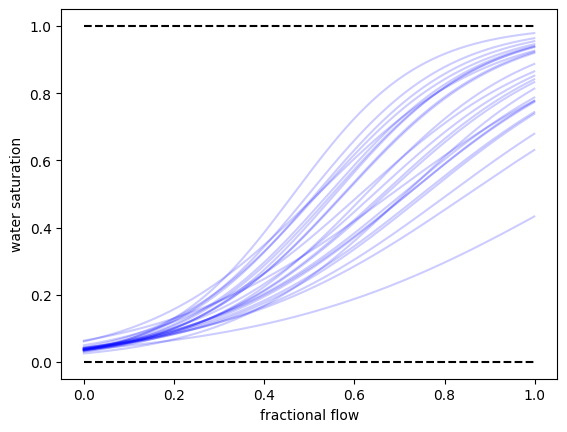

In [4]:

# https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-4-immiscible-displacement/buckley-leverett-theory/
mu_o = 5.0
mu_w = 1.0

ratio = lambda a, b, Sw : 1/(1 +  (mu_o/mu_w) * (a*np.exp(-b*Sw)))

a_mean = 5.0
b_mean = 5.0

a_std = a_mean/5
b_std = b_mean/5

# perturb a and b
aw = np.random.normal(loc=a_mean, scale=a_std, size=25)
bw = np.random.normal(loc=b_mean, scale=b_std, size=25)


Sw = np.arange(0.0, 1.0, 0.001)

fw = np.array([np.array([ratio(a, b, sw) for sw in Sw]) for a, b in zip(aw, bw)]).T

plt.figure()
plt.plot(Sw, fw, color="blue", alpha=0.2)
plt.hlines(0.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.hlines(1.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.xlabel("fractional flow")
plt.ylabel("water saturation")

Text(0, 0.5, 'water saturation')

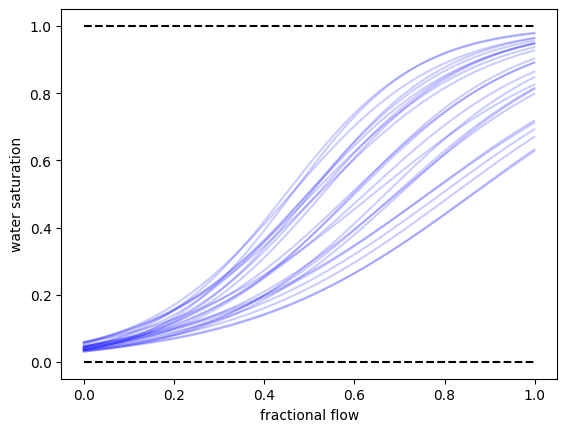

In [3]:

# https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-4-immiscible-displacement/buckley-leverett-theory/
mu_o = 5.0
mu_w = 1.0

ratio = lambda a, b, Sw : 1/(1 +  (mu_o/mu_w) * (a*np.exp(-b*Sw)))

a_mean = 5.0
b_mean = 5.0

a_std = a_mean/5
b_std = b_mean/5

# perturb a and b
aw = np.random.normal(loc=a_mean, scale=a_std, size=25)
bw = np.random.normal(loc=b_mean, scale=b_std, size=25)


Sw = np.arange(0.0, 1.0, 0.001)

fw = np.array([np.array([ratio(a, b, sw) for sw in Sw]) for a, b in zip(aw, bw)]).T

plt.figure()
plt.plot(Sw, fw, color="blue", alpha=0.2)
plt.hlines(0.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.hlines(1.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.xlabel("fractional flow")
plt.ylabel("water saturation")